In [1]:
import os
print(os.getcwd())

c:\Vansh\emotion engine


In [2]:
import torch 
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from gesture_model import GestureTransformer
# Hyperparams
seq_len = 20 # Number of timesteps per gesture sequence
input_dim = 32 # Features per timestep
output_dim = 6 # Number of emotion classes
batch_size = 32

# Instantiate model
model = GestureTransformer(input_dim=input_dim, output_dim=output_dim)
# Dummy gesture dataset (replace with real later)
X = torch.randn(1000, seq_len, input_dim) # shape: (samples, seq_len, input_dim)
y = torch.randint(0, output_dim, (1000,))  # shape: (1000,)

# DataLoader
dataset = TensorDataset(X,y)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


c:\Vansh\torch_env\Lib\site-packages\torch\nn\modules\transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [3]:
criterion =  nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

GestureTransformer(
  (embedding): Linear(in_features=32, out_features=128, bias=True)
  (transformer): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=128, bias=True)
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (fc): Linear(in_features=128, out_features=6, bias=True)
)

Epoch 1 | Loss: 61.8365
Epoch 2 | Loss: 57.8580
Epoch 3 | Loss: 57.3633
Epoch 4 | Loss: 56.9477
Epoch 5 | Loss: 56.7497
Epoch 6 | Loss: 56.1785
Epoch 7 | Loss: 53.8433
Epoch 8 | Loss: 50.6794
Epoch 9 | Loss: 45.2937
Epoch 10 | Loss: 42.6917


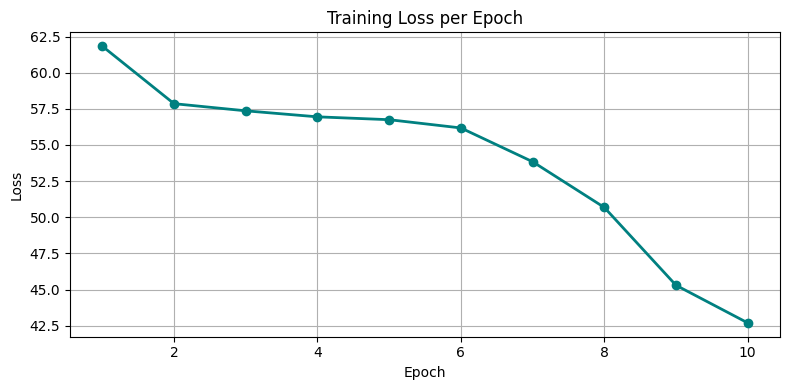

In [5]:
import matplotlib.pyplot as plt
n_epochs = 10
epoch_losses = []  # To track loss per epoch
for epoch in range(n_epochs):
    model.train()
    total_loss = 0
    for batch_x, batch_y in train_loader:
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)

        optimizer.zero_grad()
        preds = model(batch_x)
        loss = criterion(preds, batch_y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    epoch_losses.append(total_loss)  # ✅ Track this epoch's loss
    print(f"Epoch {epoch+1} | Loss: {total_loss:.4f}")

# Plot loss curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, n_epochs + 1), epoch_losses, marker='o', color='teal', linewidth=2)
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()
